Importing basic libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

df = pd.read_csv('/content/drive/MyDrive/github/heart_prediction/cleveland.csv')
cols = ['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholestrol',
      'fasting_bp', 'rest_ecg', 'max_heartrate', 'exercise_induced_anigma', 
      'oldpeak_st', 'slope_st', 'major_vessels', 'thal', 'target']
df.columns=cols
print("Shape : ",df.shape)

Shape :  (302, 14)


In [2]:
df.head()

,age,sex,chest_pain_type,rest_bp,cholestrol,fasting_bp,rest_ecg,max_heartrate,exercise_induced_anigma,oldpeak_st,slope_st,major_vessels,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
print(df.dtypes)

age                          int64
sex                          int64
chest_pain_type              int64
rest_bp                      int64
cholestrol                   int64
fasting_bp                   int64
rest_ecg                     int64
max_heartrate                int64
exercise_induced_anigma      int64
oldpeak_st                 float64
slope_st                     int64
major_vessels              float64
thal                       float64
target                       int64
dtype: object


In [4]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
rest_bp                    0
cholestrol                 0
fasting_bp                 0
rest_ecg                   0
max_heartrate              0
exercise_induced_anigma    0
oldpeak_st                 0
slope_st                   0
major_vessels              4
thal                       2
target                     0
dtype: int64

In [5]:
df['major_vessels']=df['major_vessels'].interpolate()
df['thal']=df['thal'].interpolate(method='pad')

'''The output has 5 labels but can be grouped as two class
labels as Non-Zeros to Heart_disease exists and 
Zeros to Heart disease does not exist '''

df['target']=df['target'].map({0:0,1:1,2:1,3:1,4:1})
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
rest_bp                    0
cholestrol                 0
fasting_bp                 0
rest_ecg                   0
max_heartrate              0
exercise_induced_anigma    0
oldpeak_st                 0
slope_st                   0
major_vessels              0
thal                       0
target                     0
dtype: int64

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)

Inputs shape  (302, 13)
Outputs shape  (302, 1)


Splitting the data 

In [7]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.197)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(60, 13)
(242, 1)
(60, 1)


In [8]:
x_train_sample=x_train[0]
y_train_sample=y_train[0]

Feature scaling using Standardization

In [9]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train=scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)

Saving Standardized object which was fitted by dataset ,for furthur test cases

In [10]:
pickle.dump(scaled,open('/content/drive/MyDrive/github/heart_prediction/pickle_files/standard_scaler.pkl','wb'))


In [11]:
x_train[0]

array([ 0.55570263, -1.47790748,  0.86370844,  2.37974017,  0.04486492,
       -0.41803981, -1.01673728, -0.28852377,  1.40984195, -0.89505761,
        0.61905151, -0.71099177, -0.89291761])

In [12]:
x_test[0]

array([-0.23869421,  0.67663234, -2.28730829, -0.8139852 , -1.14471871,
       -0.41803981,  1.00006945,  1.7173866 , -0.70929937, -0.89505761,
        0.61905151, -0.71099177,  0.64688805])

In [13]:
print("0 th train output value",y_train[0])
print("0 th test output value",y_test[0])

0 th train output value [1]
0 th test output value [0]


Dimensionality reduction (*optional use)

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda=LinearDiscriminantAnalysis(n_components=1)
x_train_lda=lda.fit_transform(x_train,y_train)
x_test_lda=lda.transform(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


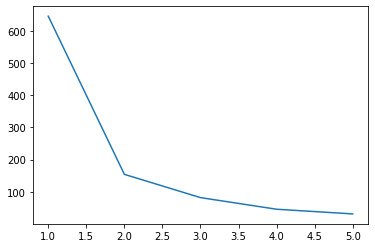

In [15]:
#LDA for all input values to find patterns in clustering
x_c_i=lda.fit_transform(x,y)

wcss=[]
from sklearn.cluster import KMeans
for i in range(1,6):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x_c_i)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)

Even if there were different values in target values {0,1,2,3,4}, 
maping them to only two classes of output was good indeed as the 
elbow point in the clusters after LDA optimally leads to two output
 classes with least wcss 

Support Vector Classification(SVC)

In [16]:
from sklearn.svm import SVC
svc=SVC()
# svc=SVC(C=0.45,gamma=0.15)     grid cross validation didn't give optimal solution
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

#saving the model svc
pickle.dump(svc, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/svc.pkl", "wb"))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix Plot SVC

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.78      0.91      0.84        23

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60



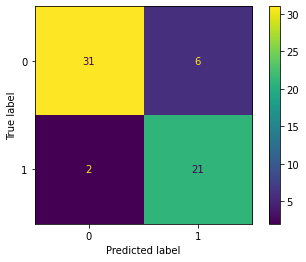

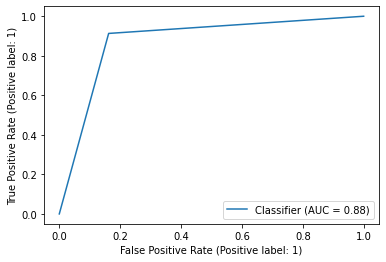

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay,plot_confusion_matrix

matrix_plot=confusion_matrix(y_test, y_pred_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=svc.classes_)
disp.plot()
print(classification_report(y_test, y_pred_svc))
RocCurveDisplay.from_predictions(y_test,y_pred_svc)

SVC with LDA

Confusion Matrix Plot SVC LDA

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        37
           1       0.81      0.91      0.86        23

    accuracy                           0.88        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


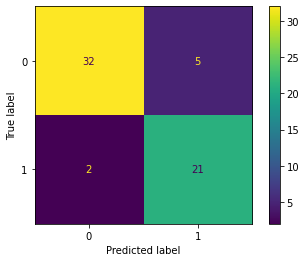

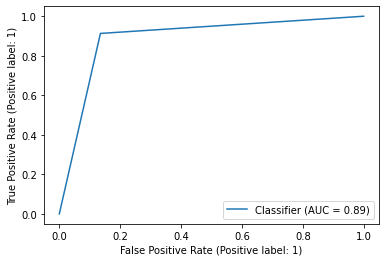

In [18]:
#SVC with LDA

svc.fit(x_train_lda,y_train)
y_pred_svclda=svc.predict(x_test_lda)

#saving the model svc with lda data 
pickle.dump(svc, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/svc_lda.pkl", "wb"))

matrix_plot=confusion_matrix(y_test, y_pred_svclda, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=svc.classes_)
disp.plot()
print(classification_report(y_test, y_pred_svclda))
RocCurveDisplay.from_predictions(y_test,y_pred_svclda)

K Nearest Neighbour Classifier and 

Confusion Matrix plot KNN Classifier

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        37
           1       0.81      0.91      0.86        23

    accuracy                           0.88        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


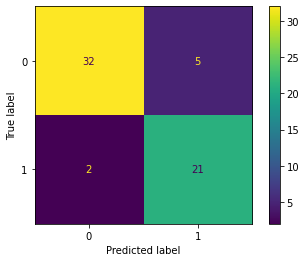

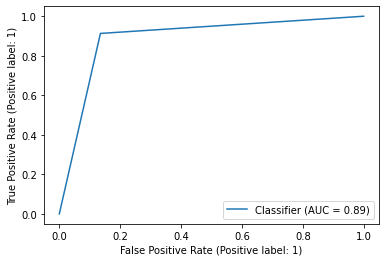

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

#saving the model knn
pickle.dump(knn, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/knn.pkl", "wb"))

matrix_plot=confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=knn.classes_)
disp.plot()
print(classification_report(y_test, y_pred_knn))
RocCurveDisplay.from_predictions(y_test,y_pred_knn)

K Nearest Neighbour Classifier with lda and 

Confusion Matrix plot KNN Classifier with lda

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        37
           1       0.70      0.91      0.79        23

    accuracy                           0.82        60
   macro avg       0.82      0.83      0.81        60
weighted avg       0.84      0.82      0.82        60



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


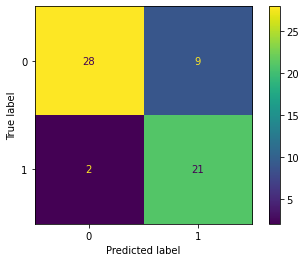

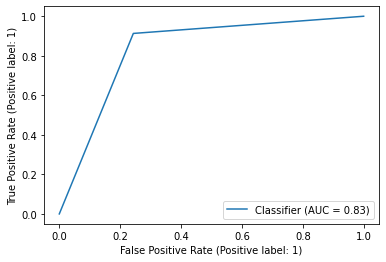

In [20]:

knn.fit(x_train_lda,y_train)
y_pred_knnlda=knn.predict(x_test_lda)

#saving the model knn
pickle.dump(knn, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/knn_lda.pkl", "wb"))

matrix_plot=confusion_matrix(y_test, y_pred_knnlda, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=knn.classes_)
disp.plot()
print(classification_report(y_test, y_pred_knnlda))
RocCurveDisplay.from_predictions(y_test,y_pred_knnlda)

Random Forest Classifier and 

Confusion Matrix plot Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.85      0.96      0.90        23

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



<ipython-input-21-46e68873cd37>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


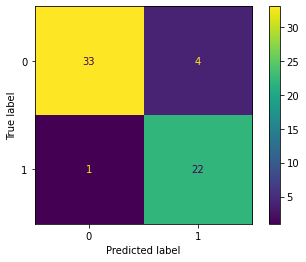

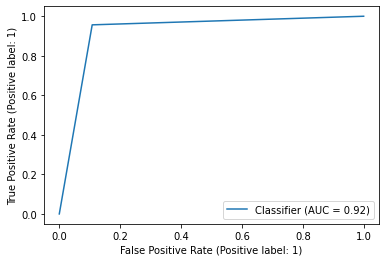

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10,random_state=2022)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)

#saving the model random forest
pickle.dump(classifier, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/forest_classifier.pkl", "wb"))

matrix_plot=confusion_matrix(y_test, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forest))
RocCurveDisplay.from_predictions(y_test,y_pred_forest)

Random Forest Classifier with LDA 

and 

Confusion Matrix plot Random Forest Classifier with LDA

<ipython-input-22-04648ff7ff27>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_lda,y_train)


              precision    recall  f1-score   support

           0       0.93      0.73      0.82        37
           1       0.68      0.91      0.78        23

    accuracy                           0.80        60
   macro avg       0.80      0.82      0.80        60
weighted avg       0.83      0.80      0.80        60



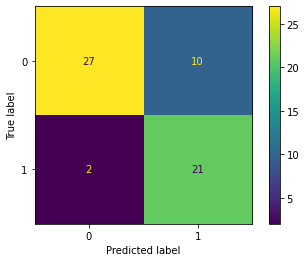

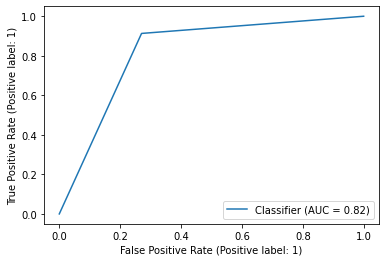

In [22]:
#Random Forest with lda
#guess not good
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100,random_state=2022)
classifier.fit(x_train_lda,y_train)
y_pred_forestlda=classifier.predict(x_test_lda)

#saving the model random forest with lda
pickle.dump(classifier, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/forest_classifier_lda.pkl", "wb"))

matrix_plot=confusion_matrix(y_test, y_pred_forestlda, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forestlda))
RocCurveDisplay.from_predictions(y_test,y_pred_forestlda)

Bernoulii NB Classifier  

and 

Confusion Matrix plot Bernoulii NB Classifier 

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.84      0.91      0.87        23

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


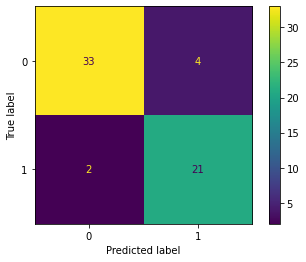

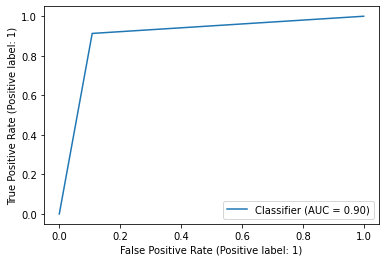

In [23]:
from sklearn.naive_bayes import BernoulliNB
#As a result of standard scalar there exists negative values in data
#Thus not suitable for Multinomial and Categorical NB 
#Bernouli works fine but some features have data which are not boolean like
#Thus I guess its not a fine fit
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)

#saving the model bernouli
pickle.dump(bnb, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/bernoulli_nb.pkl", "wb"))

matrix_plot=confusion_matrix(y_test, y_pred_bnb, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=bnb.classes_)
disp.plot()
print(classification_report(y_test, y_pred_bnb))
RocCurveDisplay.from_predictions(y_test,y_pred_bnb)

Bernoulii NB Classifier  with LDA

and 

Confusion Matrix plot Bernoulii NB Classifier with LDA

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        37
           1       0.81      0.91      0.86        23

    accuracy                           0.88        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


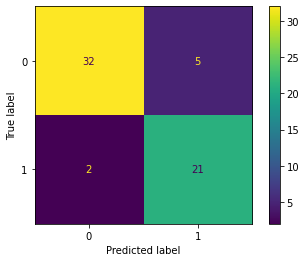

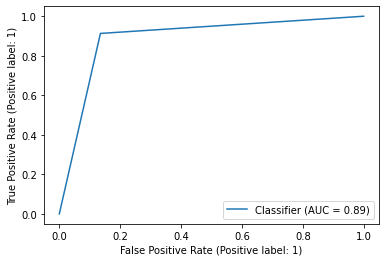

In [24]:
#BernouliNB with LDA 
bnb.fit(x_train_lda,y_train)
y_pred_bnblda=bnb.predict(x_test_lda)

#saving the model bernouli with LDA
pickle.dump(bnb, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/bernoulli_nb_lda.pkl", "wb"))

matrix_plot=confusion_matrix(y_test, y_pred_bnblda, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=bnb.classes_)
disp.plot()
print(classification_report(y_test, y_pred_bnblda))
RocCurveDisplay.from_predictions(y_test,y_pred_bnblda)

Artificial Neural Network (ANN)

In [25]:
import tensorflow as tf
from tensorflow import keras

# Used this if using output as two different class outputs
# from  tensorflow.keras.utils import to_categorical

# Ouput is 2 class;   0 th -> no HD , 1th -> HD 
# y_train=to_categorical(y_train,2)
# y_test=to_categorical(y_test,2) 


A good recommendation :  to get a proper result you must have data for at-least 10 times the degree of freedom.

example for a neural network which has 3 weights you should have 30 data points.

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

input_size=13  #Number of features 
output_size=2  #HD or No HD

ann=Sequential()
ann.add(Dense(units=64,activation='relu',input_shape=(input_size,))) #relu because it has a broder working range for activation of features
ann.add(Dense(units=32,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid')) #Since output is two classes ; sigmoid goes well 

In [27]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


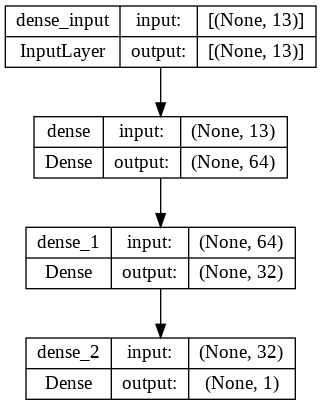

In [28]:
keras.utils.plot_model(ann,show_shapes=True)

In [29]:
ann.compile(loss='BinaryCrossentropy',
            optimizer='adam',
            metrics=['BinaryAccuracy'])

In [30]:
call_here=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=1)

ann_model_data=ann.fit(x_train,y_train,
        epochs=20,
        batch_size=1,
        validation_split=0.1,
        callbacks=[call_here])

Epoch 1/20
217/217 [==============================] - 2s 7ms/step - loss: 0.5219 - binary_accuracy: 0.7327 - val_loss: 0.4535 - val_binary_accuracy: 0.8400
Epoch 2/20
217/217 [==============================] - 1s 6ms/step - loss: 0.3886 - binary_accuracy: 0.8065 - val_loss: 0.4491 - val_binary_accuracy: 0.8000
Epoch 3/20
217/217 [==============================] - 1s 5ms/step - loss: 0.3495 - binary_accuracy: 0.8387 - val_loss: 0.4554 - val_binary_accuracy: 0.8000


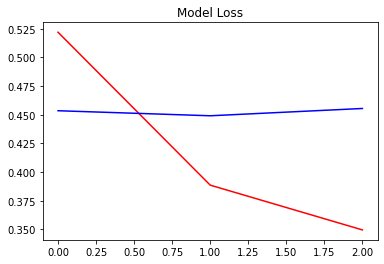

In [31]:
# plt.plot(ann_model_data.history['binary_accuracy'],c='red')
# plt.plot(ann_model_data.history['val_binary_accuracy'],c='blue')

plt.plot(ann_model_data.history['loss'],c='red')
plt.plot(ann_model_data.history['val_loss'],c='blue')
plt.title('Model Loss')
plt.show()

2/2 [==============================] - 0s 7ms/step
Results for ann Model
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.75      0.91      0.82        23

    accuracy                           0.85        60
   macro avg       0.84      0.86      0.85        60
weighted avg       0.87      0.85      0.85        60



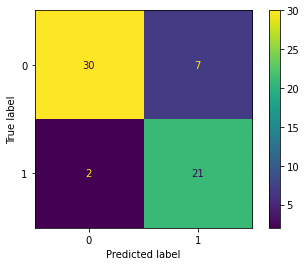

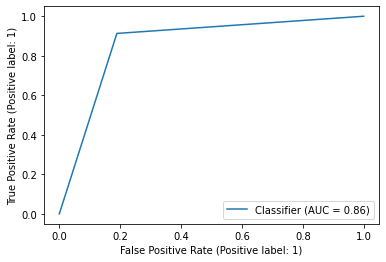

In [32]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_ann = np.round(ann.predict(x_test)).astype(int)

print('Results for ann Model')

matrix_plot=confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=bnb.classes_)
disp.plot()

print(classification_report(y_test, y_pred_ann))
RocCurveDisplay.from_predictions(y_test, y_pred_ann)


#Saving the model ann
pickle.dump(ann, open("/content/drive/MyDrive/github/heart_prediction/pickle_files/ann.pkl", "wb"))

# Use this for Confusion matrix plot for 2 output neural network

# matrix_plot=confusion_matrix(y_test.argmax(axis=1), y_pred_ann.argmax(axis=1))
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
#                              display_labels=bnb.classes_)
# disp.plot()

# print(classification_report(y_test.argmax(axis=1), y_pred_ann.argmax(axis=1)))
# RocCurveDisplay.from_predictions(y_test.argmax(axis=1), y_pred_ann.argmax(axis=1))

Performance Comparision

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


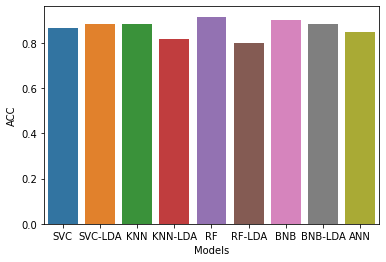

In [42]:
plot_acc=pd.DataFrame({'Models':['SVC','SVC-LDA','KNN','KNN-LDA','RF','RF-LDA','BNB','BNB-LDA','ANN'],
                         'ACC':[accuracy_score(y_test,y_pred_svc),
                                accuracy_score(y_test,y_pred_svclda),
                                accuracy_score(y_test,y_pred_knn),
                                accuracy_score(y_test,y_pred_knnlda),
                                accuracy_score(y_test,y_pred_forest),
                                accuracy_score(y_test,y_pred_forestlda),
                                accuracy_score(y_test,y_pred_bnb),
                                accuracy_score(y_test,y_pred_bnblda),
                                accuracy_score(y_test,y_pred_ann)]})


import seaborn as  sns
sns.barplot(plot_acc['Models'],plot_acc['ACC'])


Loading of the Model  & stadardization object

In [34]:
x_samples=x
y_samples=y

In [35]:
#Load model
loaded_model=pickle.load(open('/content/drive/MyDrive/github/heart_prediction/pickle_files/forest_classifier.pkl','rb'))
#Load standard scaler object while it was training
scale_data = pickle.load(open('/content/drive/MyDrive/github/heart_prediction/pickle_files/standard_scaler.pkl','rb'))

Using Random Forest Algorithm as it gives best results

Testing all inputs for the random forest model


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       163
           1       0.97      0.97      0.97       139

    accuracy                           0.97       302
   macro avg       0.97      0.97      0.97       302
weighted avg       0.97      0.97      0.97       302



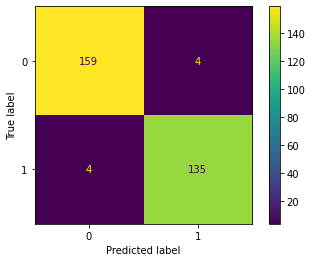

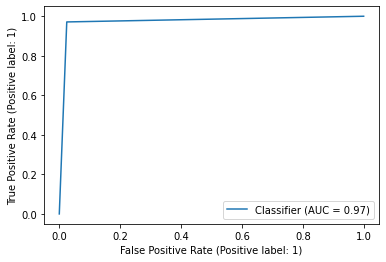

In [36]:
lt=[]

for i in range(302):
  temp_data=scale_data.transform([x_samples[i]])
  result=loaded_model.predict(temp_data)
  lt.append(result[0])
lt =np.array(lt)


matrix_plot=confusion_matrix(y_samples, lt, labels=loaded_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=loaded_model.classes_)
disp.plot()
print(classification_report(y_samples, lt))
RocCurveDisplay.from_predictions(y_samples,lt)